<a href="https://colab.research.google.com/github/predator4hack/chandan/blob/master/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#discription:this program uses convolutional neural network(CNN)
#       to classify handwritten digits as numers 0-9

In [3]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
#load the data and split it into train and test sets
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
#get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#take a look at the first image (at index=0) in the training dat set
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#print the image label
y_train[0]

5

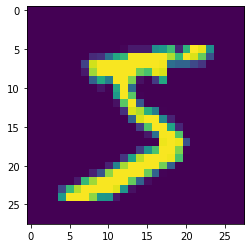

In [8]:
#show the image as picture
plt.imshow(X_train[0])

In [0]:
#reshape the data to fit the model
X_train =X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [10]:
#one -HOt encoding:
y_train_one_hot=to_categorical(y_train)  #converting the label into binary
y_test_one_hot=to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
#build the cnn model
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [12]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#train the model
hist=model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 183s 3ms/step - loss: 13.4548 - acc: 0.1650 - val_loss: 13.3786 - val_acc: 0.1698
Epoch 2/3
60000/60000 [==============================] - 181s 3ms/step - loss: 14.1823 - acc: 0.1200 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/3
60000/60000 [==============================] - 182s 3ms/step - loss: 14.4700 - acc: 0.1022 - val_loss: 14.4902 - val_acc: 0.1010


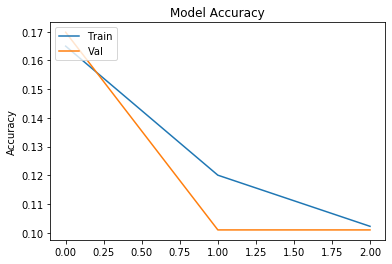

In [14]:
#visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')

In [18]:
#show predictions as probabilities for the first four images in the test set
predictions=model.predict(X_test[:4])
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
#print our predictions as number labels for the first 4 images
print(np.argmax(predictions,axis=1))
#print the actual labels
print(y_test[:4])

[3 3 3 3]
[7 2 1 0]


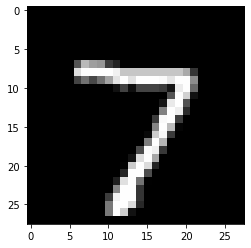

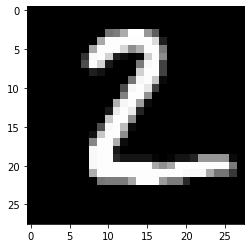

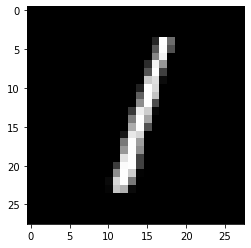

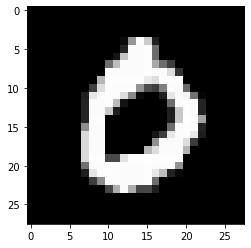

In [21]:
#show the first 4 images as pictures
for i in range(0,4):
  image=X_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()